导入相关的数据和类库


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
%matplotlib inline
#import train and test data.
train=pd.read_csv('input/train.csv')
name=train.Name
train.head()

D:\rgzn\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
D:\rgzn\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
D:\rg

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


在今天的数据集中有两组数据:
- 训练集 (train.csv)
<br>
训练集的数据中包含性别 票价 船舱等级和是否存活下来等信息，这些信息用来创建BP神经网络模型。
<br><br>
在测试集中不包含人员是否存活信息
<br><br>
<h4>变量定义</h4>
- 是否存活
 - 0= 死亡
 - 1= 存活
- pclass (船舱等级)
 - 1=1st  头等
 - 2=2nd  二等
 - 3=3rd  三等
 
- sex  性别
<br>

- age  年龄


- sibsp (兄弟姐妹数量 / 配偶数)
<br>
- parch (父母数量 / 小孩)
<br>
- tickets  船票序列号
<br>
- fare  票价
<br>
- cabin  船舱位置
- embarked 上船港口
 - C = Cherbourg, 法国瑟堡
 - Q = Queenstown,  爱尔兰城市皇后镇（又译昆士敦）
 - S = Southampton  英国 南安普顿
- pclass: 船舱等级 ()
<br>
<h4></h4>
 - 1st = 头等
 - 2nd = 中等
 - 3rd = 三等



Part 1 数据清理

In [2]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据集中的不同类型
四类数据集

数字类特征: 年龄，票价，兄弟姐妹配偶数量，父母小孩数量

类别特征: 性别，港口，船舱等级，是否存活

包含数字和字符的特征: 船票和船舱

文字类特征: 姓名

** 在做数据整理的过程中我们会对上述四类数据进行调整**

In [3]:
#查看数据结构
train.shape

(891, 12)

In [4]:
#查看缺失值情况
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**如何处理数据空值，用最高频的数据进行填充**

In [5]:
#通过values_counts获取age字段最高频次age_maxf
age_maxf = train['Age'].value_counts().index[0]
#然后再对age字段中缺少的数据用age_maxf进行填充
train['Age2'] = train['Age'].fillna(age_maxf)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [7]:
#删除原先那age这一列
train.drop('Age',axis=1,inplace=True)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [9]:
#对序列进行重新排序
train.set_index('PassengerId',inplace=True)
## get dummy variables for Column sex and embarked since they are categorical value.
#对sex和embarked进行分开，也就是如图所示
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)


In [10]:
train.head(5)

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.0,1,0,1


In [11]:
#先对fare字段进行数据转化为浮点数形式
train['Fare'] = train['Fare'].astype(float)
#然后再根据它的值进行划分为3类
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

In [12]:
train.head(5)

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0.0,NaN,22.0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3.0,C85,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,1.0,NaN,26.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3.0,C123,35.0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1.0,NaN,35.0,1,0,1


In [13]:
#先对age字段进行数据转化为整数形式
train['Age2']=train['Age2'].astype(int)
#再对年龄进行分类
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4

In [14]:
train.head(5)

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0.0,NaN,1,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3.0,C85,2,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,1.0,NaN,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3.0,C123,2,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1.0,NaN,2,1,0,1


In [15]:
#删除一些无意义的特征项
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0.0,1,1,0,1
2,1,1,1,0,3.0,2,0,0,0
3,1,3,0,0,1.0,1,0,0,1
4,1,1,1,0,3.0,2,0,0,1
5,0,3,0,0,1.0,2,1,0,1


In [16]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0.0,1,1,0,1
2,1,1,1,0,3.0,2,0,0,0
3,1,3,0,0,1.0,1,0,0,1
4,1,1,1,0,3.0,2,0,0,1
5,0,3,0,0,1.0,2,1,0,1


Part2 EDA

In [17]:
#查看结果项的结果数量类型
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
#查看结果项的结果占比
train.Survived.value_counts()/len(train)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [19]:
#对dataframe进行描述性分析
train.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,1.505051,1.288440,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,1.118148,0.812038,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [20]:
#算出它们的均值
train.groupby('Sex_male').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,1.882166,1.210191,0.114650,0.646497
1,0.188908,2.389948,0.429809,0.235702,1.299827,1.331023,0.071057,0.764298


通过统计分析发现，总的生存率是38%
其中女性的存活率是74%，男性的存活率是19%

使用相关性矩阵和热力图演示关联度

In [21]:
train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.295875,-0.044492,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.628459,-0.358005,0.131900,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.394248,-0.218846,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.393048,-0.134014,-0.245489,-0.081228,0.063036
Fare,0.295875,-0.628459,0.394248,0.393048,1.000000,0.096773,-0.248940,-0.242653,-0.029734
Age2,-0.044492,-0.358005,-0.218846,-0.134014,0.096773,1.000000,0.071125,-0.079779,0.016203
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.248940,0.071125,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.242653,-0.079779,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.029734,0.016203,0.125722,-0.496624,1.000000


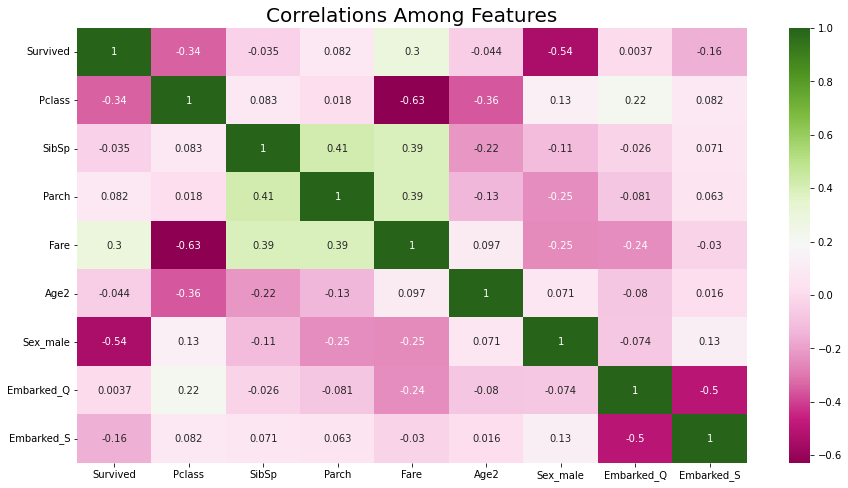

In [22]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

其中正相关的部分最明显的是船票价格和生存率 达到0.26
负相关部分 性别和生存率之间是 -0.54
          船票价格和船舱等级是 -0.55
          船舱等级和生存率之间是 -0.34

性别和生存率的关系

([<matplotlib.axis.XTick at 0x2b24b84bdc8>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

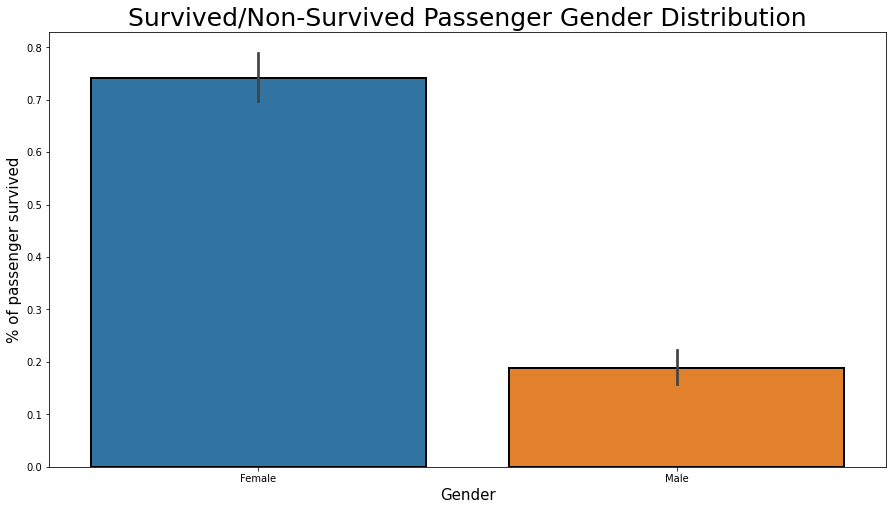

In [23]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex_male", y = "Survived", data=train, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(train.Sex_male.unique()), labels)

女性的存活率是74%，男性的存活率是19%

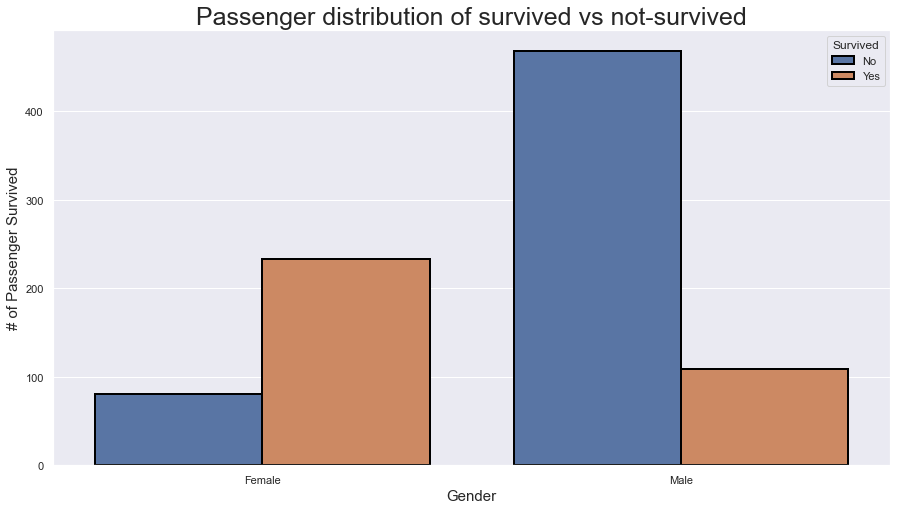

In [24]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

结论 在这场灾难中 女士优先

船舱等级和生存率

In [25]:
train.head(4)

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0.0,1,1,0,1
2,1,1,1,0,3.0,2,0,0,0
3,1,3,0,0,1.0,1,0,0,1
4,1,1,1,0,3.0,2,0,0,1


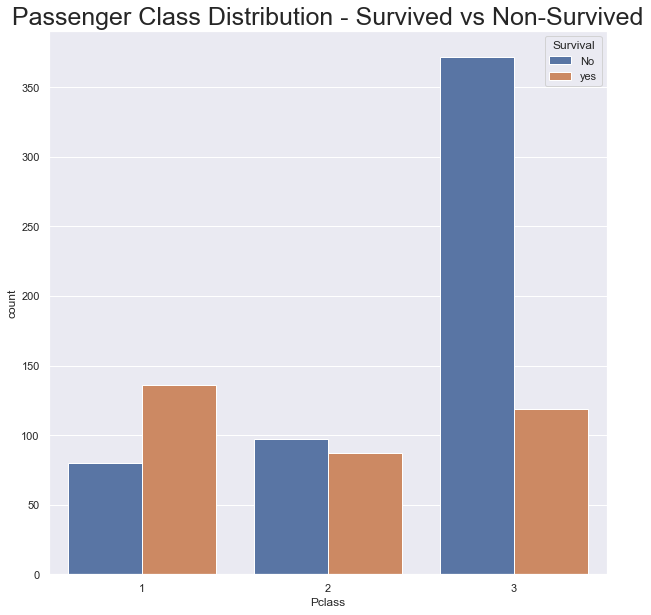

In [26]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")


头等舱的客人存活率是63%
二等舱的客人存活率是48%
三等舱的客人存活率是24%

([<matplotlib.axis.XTick at 0x2b24bf32548>,
 [Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')])

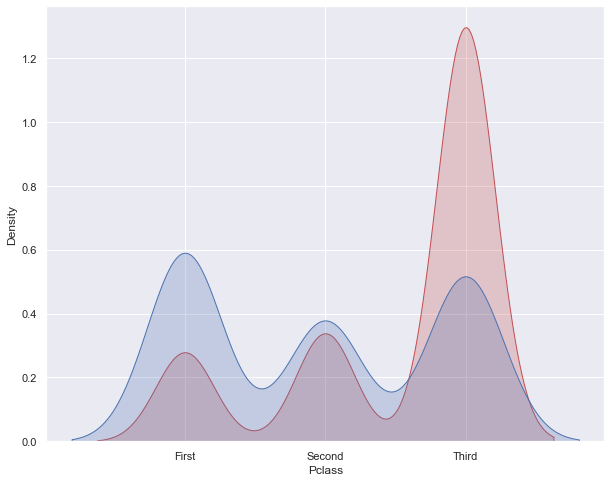

In [27]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

票价和生存率

Text(0.5, 0, 'Fare')

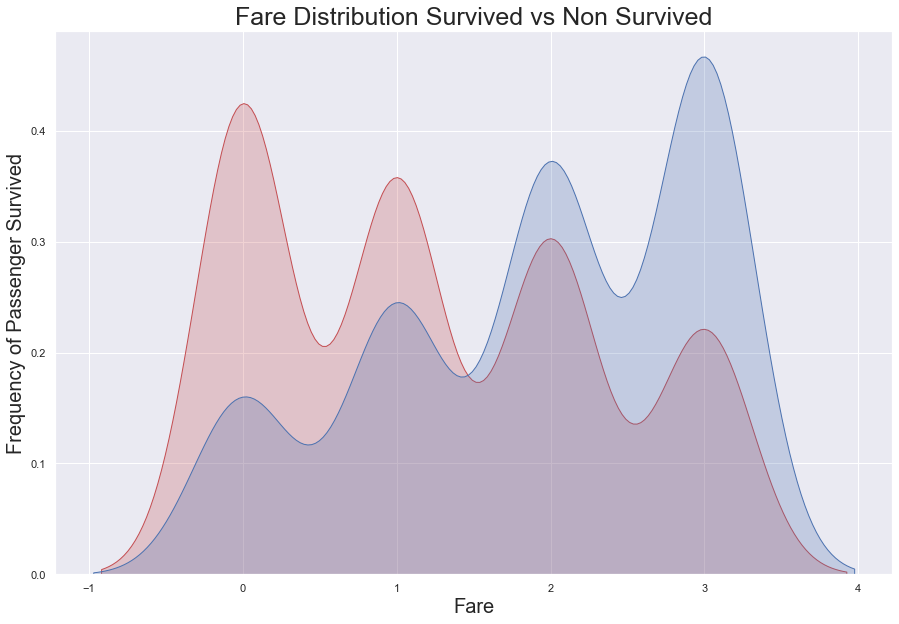

In [28]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

年龄和生存率

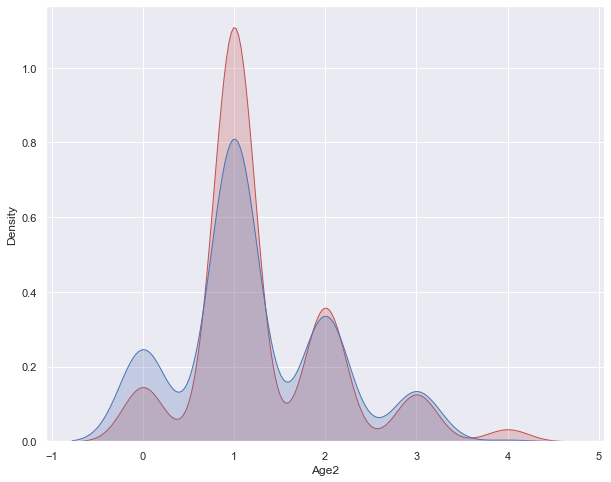

In [29]:
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')

In [30]:
train.head(5)

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0.0,1,1,0,1
2,1,1,1,0,3.0,2,0,0,0
3,1,3,0,0,1.0,1,0,0,1
4,1,1,1,0,3.0,2,0,0,1
5,0,3,0,0,1.0,2,1,0,1


In [31]:
#选取特征集
x_data = train.drop(['Survived'],axis=1)
#将dataframe转换为array形式
x_data = np.array(x_data)

In [32]:
#选取结果集
y_data = train[['Survived']]
y_data = np.array(y_data)

In [50]:
# 定义一个神经网络，结构：8-5-1
# 定义输入层到隐藏层之间的权值矩阵
V = np.random.random((8,5))*2-1
# 定义隐藏层到输出层之间的权值矩阵
W = np.random.random((5,1))*2-1
#划分30%为测试集，70%为训练集，
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3)

In [51]:
# 激活函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 激活函数的导数
def dsigmoid(x):
    return x*(1-x)

# 训练模型
def train(X,y,steps=10000,lr=0.01):
    global V,W
    for n in range(steps+1):
        # 随机选取一个数据
        i = np.random.randint(X.shape[0])
        # 获取一个数据
        x = X[i]
        x = np.atleast_2d(x)
        # BP算法公式
        # 计算隐藏层的输出
        L1 = sigmoid(np.dot(x,V))
        # 计算输出的输出
        L2 = sigmoid(np.dot(L1,W))
        # 计算L2_delta，L1_delta
        L2_delta = (y[i]-L2)*dsigmoid(L2)
        L1_delta = L2_delta.dot(W.T)*dsigmoid(L1)
        # 更新权值
        W += lr*L1.T.dot(L2_delta)
        V += lr*x.T.dot(L1_delta)
        # 每训练1000次预测一次准确率
        if n%1000==0:
            output = predict(x_test)
            predictions = np.argmax(output,axis=1)
            acc = np.mean(np.equal(predictions,y_test))
            print('steps:',n,'accuracy:',acc)

def predict(x):
    # 计算隐藏层的输出
    L1 = sigmoid(np.dot(x,V))
    # 计算输出的输出
    L2 = sigmoid(np.dot(L1,W))
    return L2

In [52]:
#训练30000次周期
train(x_train,y_train,30000)

steps: 0 accuracy: 0.6865671641791045
steps: 1000 accuracy: 0.6865671641791045
steps: 2000 accuracy: 0.6865671641791045
steps: 3000 accuracy: 0.6865671641791045
steps: 4000 accuracy: 0.6865671641791045
steps: 5000 accuracy: 0.6865671641791045
steps: 6000 accuracy: 0.6865671641791045
steps: 7000 accuracy: 0.6865671641791045
steps: 8000 accuracy: 0.6865671641791045
steps: 9000 accuracy: 0.6865671641791045
steps: 10000 accuracy: 0.6865671641791045
steps: 11000 accuracy: 0.6865671641791045
steps: 12000 accuracy: 0.6865671641791045
steps: 13000 accuracy: 0.6865671641791045
steps: 14000 accuracy: 0.6865671641791045
steps: 15000 accuracy: 0.6865671641791045
steps: 16000 accuracy: 0.6865671641791045
steps: 17000 accuracy: 0.6865671641791045
steps: 18000 accuracy: 0.6865671641791045
steps: 19000 accuracy: 0.6865671641791045
steps: 20000 accuracy: 0.6865671641791045
steps: 21000 accuracy: 0.6865671641791045
steps: 22000 accuracy: 0.6865671641791045
steps: 23000 accuracy: 0.6865671641791045
steps

In [53]:
#查看结果项，结果并不理想
output = predict(x_test)
predictions = np.argmax(output,axis=1)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81       268
           1       0.00      0.00      0.00         0

    accuracy                           0.69       268
   macro avg       0.50      0.34      0.41       268
weighted avg       1.00      0.69      0.81       268



D:\rgzn\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [57]:
#更换MLP模型用于二分类模型训练
# 构建模型，2个隐藏层，第1隐藏层100个神经元，第2隐藏层50个神经元，训练500周期
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=5000)
#对模型进行拟合
mlp.fit(x_train, y_train)

D:\rgzn\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [58]:
print('层数：%s，输出单元数量：%s' % (mlp.n_layers_, mlp.n_outputs_))
predictions = mlp.predict(x_test)
print('准确率：%s' % mlp.score(x_test, y_test))

层数：4，输出单元数量：1
准确率：0.8022388059701493


D:\rgzn\lib\site-packages\sklearn\preprocessing\label.py:749: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(y > threshold, dtype=np.int)
D:\rgzn\lib\site-packages\sklearn\preprocessing\label.py:749: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

In [59]:
#查看它的recall和f1
predictions = mlp.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       184
           1       0.70      0.64      0.67        84

    accuracy                           0.80       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.80      0.80      0.80       268



D:\rgzn\lib\site-packages\sklearn\preprocessing\label.py:749: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(y > threshold, dtype=np.int)


In [40]:
#最后的指标都较为不错，相比来说bp神经网络就不太适合做二分类的监督学习
#MLP更适合做二分类的监督学习